In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
cols = ['sentiment','id','date','query_string','user','text']

In [3]:
df = pd.read_csv("./trainingandtestdata/training.1600000.processed.noemoticon.csv",header=None, names=cols,encoding='latin-1')

In [4]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
sentiment       1600000 non-null int64
id              1600000 non-null int64
date            1600000 non-null object
query_string    1600000 non-null object
user            1600000 non-null object
text            1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [7]:
df.query_string.value_counts()

NO_QUERY    1600000
Name: query_string, dtype: int64

In [8]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [9]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [10]:
df[df.sentiment==0].head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [11]:
df[df.sentiment == 4].head(10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [24]:
df[df.sentiment == 0].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            799990, 799991, 799992, 799993, 799994, 799995, 799996, 799997,
            799998, 799999],
           dtype='int64', length=800000)

In [25]:
df[df.sentiment==4].index

Int64Index([ 800000,  800001,  800002,  800003,  800004,  800005,  800006,
             800007,  800008,  800009,
            ...
            1599990, 1599991, 1599992, 1599993, 1599994, 1599995, 1599996,
            1599997, 1599998, 1599999],
           dtype='int64', length=800000)

In [26]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})

In [27]:
df.sentiment.value_counts()

1    800000
0    800000
Name: sentiment, dtype: int64

In [28]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [29]:
df.head()

,sentiment,text,pre_clean_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [31]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

In [34]:
pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


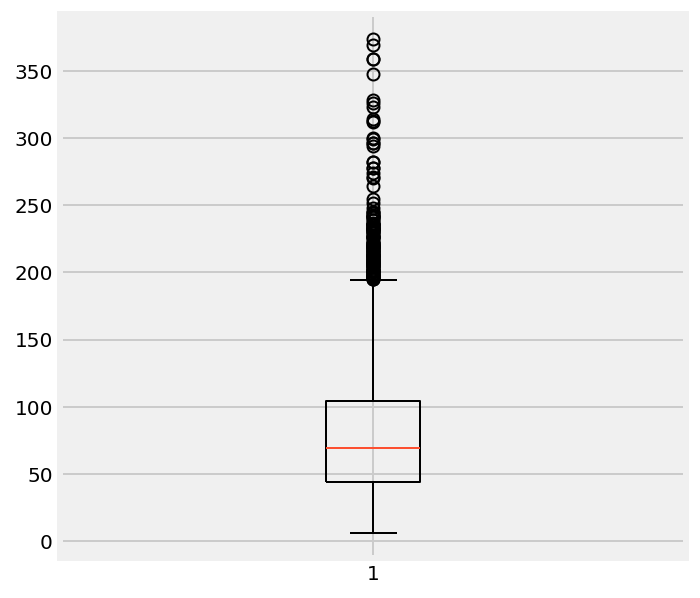

In [36]:
fig,ax=plt.subplots(figsize=(5,5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [37]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [38]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [42]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [43]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [44]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [45]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [46]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [55]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [56]:
re.sub("[^a-zA-Z]", " ", df.text[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

In [57]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [58]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [59]:
testing = df.text[:100]

In [60]:
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [62]:
pprint(test_result)

['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a '
 'result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you '
 'all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s '
 'you',
 'k nope they didn t have it',
 'que me muera',
 'spring break in plain city it s snowing',
 'i just re pierced my ears',
 'i couldn t bear to watch it and i thought the ua loss was embarrassing',
 'it it counts idk why i did either you never talk to me anymore',
 'i would ve been the first but i didn t have a gun not really though zac '
 'snyder s just a doucheclown',
 'i wish i got to watch it with you i miss you and how was the premiere',
 'hollis death

In [63]:
nums = [0,400000,800000,1200000,1600000]

In [67]:
%%time
 print("Cleaning and parsing the tweets..\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ) )                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets..

Tweets 10000 of 400000 has been processed
Tweets 20000 of 400000 has been processed
Tweets 30000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 50000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 70000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 90000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 110000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 130000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 150000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 170000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 190000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 210000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 230000 of 400000 has 

C:\Users\raghav\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'Projects '" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 240000 of 400000 has been processed
Tweets 250000 of 400000 has been processed
Tweets 260000 of 400000 has been processed
Tweets 270000 of 400000 has been processed
Tweets 280000 of 400000 has been processed
Tweets 290000 of 400000 has been processed
Tweets 300000 of 400000 has been processed
Tweets 310000 of 400000 has been processed
Tweets 320000 of 400000 has been processed
Tweets 330000 of 400000 has been processed
Tweets 340000 of 400000 has been processed
Tweets 350000 of 400000 has been processed
Tweets 360000 of 400000 has been processed
Tweets 370000 of 400000 has been processed
Tweets 380000 of 400000 has been processed
Tweets 390000 of 400000 has been processed
Tweets 400000 of 400000 has been processed
Wall time: 2min 19s


In [69]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[1],nums[2]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[2] ) )                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 410000 of 800000 has been processed
Tweets 420000 of 800000 has been processed
Tweets 430000 of 800000 has been processed
Tweets 440000 of 800000 has been processed
Tweets 450000 of 800000 has been processed
Tweets 460000 of 800000 has been processed
Tweets 470000 of 800000 has been processed
Tweets 480000 of 800000 has been processed
Tweets 490000 of 800000 has been processed
Tweets 500000 of 800000 has been processed
Tweets 510000 of 800000 has been processed
Tweets 520000 of 800000 has been processed
Tweets 530000 of 800000 has been processed
Tweets 540000 of 800000 has been processed
Tweets 550000 of 800000 has been processed
Tweets 560000 of 800000 has been processed
Tweets 570000 of 800000 has been processed
Tweets 580000 of 800000 has been processed
Tweets 590000 of 800000 has been processed
Tweets 600000 of 800000 has been processed
Tweets 610000 of 800000 has been processed
Tweets 620000 of 800000 has been processed
Tweets 630000 of 8

C:\Users\raghav\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 770000 of 800000 has been processed
Tweets 780000 of 800000 has been processed
Tweets 790000 of 800000 has been processed
Tweets 800000 of 800000 has been processed
Wall time: 2min 15s


In [70]:
len(clean_tweet_texts)

800000

In [71]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[2],nums[3]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[3]) )                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 810000 of 1200000 has been processed
Tweets 820000 of 1200000 has been processed
Tweets 830000 of 1200000 has been processed
Tweets 840000 of 1200000 has been processed
Tweets 850000 of 1200000 has been processed
Tweets 860000 of 1200000 has been processed
Tweets 870000 of 1200000 has been processed
Tweets 880000 of 1200000 has been processed
Tweets 890000 of 1200000 has been processed
Tweets 900000 of 1200000 has been processed
Tweets 910000 of 1200000 has been processed
Tweets 920000 of 1200000 has been processed
Tweets 930000 of 1200000 has been processed
Tweets 940000 of 1200000 has been processed
Tweets 950000 of 1200000 has been processed
Tweets 960000 of 1200000 has been processed
Tweets 970000 of 1200000 has been processed
Tweets 980000 of 1200000 has been processed
Tweets 990000 of 1200000 has been processed
Tweets 1000000 of 1200000 has been processed
Tweets 1010000 of 1200000 has been processed
Tweets 1020000 of 1200000 has been pro

In [72]:
len(clean_tweet_texts)

1200000

In [73]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[3],nums[4]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[4]) )                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 1210000 of 1600000 has been processed
Tweets 1220000 of 1600000 has been processed
Tweets 1230000 of 1600000 has been processed
Tweets 1240000 of 1600000 has been processed
Tweets 1250000 of 1600000 has been processed
Tweets 1260000 of 1600000 has been processed
Tweets 1270000 of 1600000 has been processed
Tweets 1280000 of 1600000 has been processed
Tweets 1290000 of 1600000 has been processed


C:\Users\raghav\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 1300000 of 1600000 has been processed
Tweets 1310000 of 1600000 has been processed
Tweets 1320000 of 1600000 has been processed
Tweets 1330000 of 1600000 has been processed
Tweets 1340000 of 1600000 has been processed
Tweets 1350000 of 1600000 has been processed
Tweets 1360000 of 1600000 has been processed
Tweets 1370000 of 1600000 has been processed
Tweets 1380000 of 1600000 has been processed
Tweets 1390000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1410000 of 1600000 has been processed
Tweets 1420000 of 1600000 has been processed
Tweets 1430000 of 1600000 has been processed
Tweets 1440000 of 1600000 has been processed
Tweets 1450000 of 1600000 has been processed
Tweets 1460000 of 1600000 has been processed
Tweets 1470000 of 1600000 has been processed
Tweets 1480000 of 1600000 has been processed
Tweets 1490000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1510000 of 1600000 has been processed
Tweets 152

In [74]:
len(clean_tweet_texts)

1600000

In [77]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment

In [78]:
clean_df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [79]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

In [12]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

C:\Users\raghav\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [13]:
import tweepy
import sqlite3
from langdetect import detect

In [17]:
consumer_key='M6vgRD6zeNhsI17cos7NHiSrZ'
consumer_secret='aGVVGbPDiB1x9NMUWzFI9g9f2jpvDEjkzPvPXBk2glGyLwDK5g'
token_key='1023159345918296064-FGcmh3h7dDl7UkNXJFXxUMGSwAJ9VJ'
token_secret='Eh0YWVNajgfzdhaKXmZsV1Yvz0weZoWJlqR3psSExvsSm'

In [18]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(token_key,token_secret)
api = tweepy.API(auth)

In [19]:
places = api.geo_search(query="London", granularity="city")

place_id_L = places[0].id
print('London id is: ',place_id_L)

London id is:  5de8cffc145c486b


In [20]:
places = api.geo_search(query="Brighton", granularity="city")

place_id_B = places[0].id
print('Brighton id is: ',place_id_B)

Brighton id is:  573ede7f6c450804


In [21]:
places = api.geo_search(query="Edinburgh", granularity="city")

place_id_E = places[0].id
print('Edinburgh id is: ',place_id_E)

Edinburgh id is:  7ae9e2f2ff7a87cd


In [24]:
maxitems = 10
print("London tweets retrieve testing")
print('----------------------------------')
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_L).items(maxitems):
    print(tweet.text)

London tweets retrieve testing
----------------------------------
@jeremycorbyn @wolfalicemusic @UKLabour Arghhhhhhh old gits jumping on the bandwagon reach for the sick bag!
@PRCA_UK @jpahughes I want that t-shirt 👍
#WorldAlzheimersDay reminds me of the great story of Family 23 that I had the privilege to tell last year.

https://t.co/caBY2AcyQL
So great to meet you @helenalper another fab member of #teamBartsHealth #LWLN #NHS70Women https://t.co/clWzATNa2r
Some photos from the ETADE conference which showcased amazing work carried out by the European-wide network of stud… https://t.co/k3ybG7IuvA
Get a feel for #RachelMaclean's exhibition (which opened last night) with a short introduction tomorrow at 4pm, off… https://t.co/ute1jhJtwW
One of my all time favourites https://t.co/SHGcwPsMi2 https://t.co/OScLIfiz5f
Ma fatemi capire, Camden Town è il regno delle cionate? Mi mangerei qualsiasi cosa 🤩
🌟What a superb reflective 2 days TY @gemmamunro1 @NHS_Jane @NHSLLA &amp; all the amazing wom

In [25]:
maxitems = 10
print("Brighton tweets retrieve testing")
print('----------------------------------')
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_B).items(maxitems):
    print(tweet.text)

Brighton tweets retrieve testing
----------------------------------
@lappinscott @SwanseaUni Many congratulations. Well deserved.
its FRIGAY!
because the best of times is NOW!
TONIGHT 9pm/2am
https://t.co/oqvg06CdPD https://t.co/73TuHbOMZJ
Theresa May warns the EU...!! Bet they are shitting themselves... #Brexshit...
@wilde Do you remember when the IRA fired rockets into the back garden of Number 10 in the days of John Major?
@raysantanu Not bad! There is a hat theme emerging!
@RecyclingRefuse recycling bins at Asda Hollingbury, golf course, County Oak, &amp; Wilmington Way are all full and ove… https://t.co/kIjVBH8LFN
A really cool interactive thingy from @ONS showing how names go in and out of fashion. https://t.co/YTZbydpDdF https://t.co/dTJdFpzwP5
@mand_brun and I've met you in the flesh, all in all, a good year  :)
Is this real? Are they really peddling #brexit red bus (lie) antics in the US? Also, “WOMEN for Kavanaugh” ratios a… https://t.co/B0MJjPWu3I
LOL https://t.co/35LhQhGOpk

In [26]:
maxitems = 10
print("Edinburgh tweets retrieve testing")
print('---------------------------------')
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_E).items(maxitems):
    print(tweet.text)

Edinburgh tweets retrieve testing
---------------------------------
@NOWTVSport I have got a trial pass for sports but when I go onto my phone to watch it, I get an error message sayi… https://t.co/ARPtxCG34r
More @woollyoriginals bags in stock! These made exclusively for my shop (both wool shade and linen lining fabric) b… https://t.co/olRxzmVF3C
@PUBG_help hi can someone help as I have info that pubg Xbox got war mode but no announcement on this page is this… https://t.co/DQ33cm7AZX
This man knows a loon when he sees one....#Brexit #Toryshambles #Omnishamblesmorelike https://t.co/WA6oLq2rqr
@GrayInGlasgow “Understanding” is beta-male cuck behaviour, Michael. The people have had enough of experts.
@gazsax @NewtonAbbotRace Really hope it’s not the only one to let me down!! https://t.co/ZuIqayYDN7
Today. Started off full of optimism, faltered a bit enroute to work, plummeted when arrived at Work, plummeted furt… https://t.co/XX4Jx4HLkB
@LNER can you give me any information on tbe delaye

In [27]:
conn = sqlite3.connect('twitter_testing.sqlite')
cur = conn.cursor()
cur.executescript('''

CREATE TABLE Tweets_London (
    id     INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    user_id TEXT,
    user_name TEXT,
    user_timezone TEXT,
    user_language TEXT,
    detected_language TEXT,
    tweet_text  TEXT,
    tweet_created TEXT
)
''')

In [28]:
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_L).items(maxitems):
    detected = detect(tweet.text)
    cur.execute('''INSERT OR IGNORE INTO Tweets_London (
        user_id, user_name, user_timezone, user_language, detected_language, tweet_text, tweet_created
        ) 
    VALUES ( ?,?,?,?,?,?,? )''', (tweet.user.id,tweet.user.screen_name,tweet.user.time_zone,tweet.user.lang,detected,tweet.text,tweet.created_at))
    conn.commit()

In [29]:
from_sql = pd.read_sql_query("SELECT * FROM Tweets_London;", conn)

In [31]:
from_sql

,id,user_id,user_name,user_timezone,user_language,detected_language,tweet_text,tweet_created
0,1,2245542291,fox59_fox,None,en,en,@SheriffDunsmur 😂😂😂 You sure have a thing abou...,2018-09-21 15:18:57
1,2,22186465,Jessica_Price95,None,en,en,Stop the world. I want to get off. WHAT THE ...,2018-09-21 15:17:47
2,3,1588802270,MaskelPaul,None,en,en,@jeremycorbyn @wolfalicemusic @UKLabour Arghhh...,2018-09-21 15:17:06
3,4,23453740,NinaWebb,None,en,en,@PRCA_UK @jpahughes I want that t-shirt 👍,2018-09-21 15:16:40
4,5,2479609908,garyhuizhang,None,en,en,#WorldAlzheimersDay reminds me of the great st...,2018-09-21 15:16:26
5,6,436659501,KathEvans2,None,en,en,So great to meet you @helenalper another fab m...,2018-09-21 15:16:17
6,7,1114004012,BirkbeckBabylab,None,en,en,Some photos from the ETADE conference which sh...,2018-09-21 15:15:51
7,8,887038645,Zabludowicz_Col,None,en,en,Get a feel for #RachelMaclean's exhibition (wh...,2018-09-21 15:15:18
8,9,266775159,neillricketts,None,en,en,One of my all time favourites https://t.co/SHG...,2018-09-21 15:15:04
9,10,335396902,LucGalassi,None,it,it,"Ma fatemi capire, Camden Town è il regno delle...",2018-09-21 15:15:02


In [35]:
api.me()

User(_api=<tweepy.api.API object at 0x000002AD8C59E470>, _json={'id': 1023159345918296064, 'id_str': '1023159345918296064', 'name': 'Manasa Hegde', 'screen_name': 'ManasaHegde19', 'location': '', 'profile_location': None, 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 2, 'listed_count': 0, 'created_at': 'Sat Jul 28 10:52:52 +0000 2018', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_prof

In [38]:
places = api.geo_search(query="Bengaluru", granularity="city")

place_id_BEN = places[0].id
print('Bengaluru id is: ',place_id_BEN)

Bengaluru id is:  1b8680cd52a711cb


In [39]:
maxitems = 10
print("Bengaluru tweets retrieve testing")
print('----------------------------------')
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_BEN).items(maxitems):
    print(tweet.text)

Bengaluru tweets retrieve testing
----------------------------------
Listen to their music, look into the meaning of their lyrics, pay attention to the message they're sending out and… https://t.co/wzOP8Rzb4L
@i_am_not_tiny And I'm not ?_?
@CNNnews18 @bhupendrachaube Good . Next time  do we celebrate Rafale deal finalisation day too ?
@sumalathaA ಸೂಪರ್ ಅಮ್ಮ...👌👌👌
@PicturesFoIder @i_am_not_tiny your grandma ewe
@blrcitytraffic @BlrCityPolice how can you allow the Flex when ban is strictly imposed ! Just raising the issue https://t.co/BFRm2H69BK
@i_am_not_tiny @itanimeirl EwE
#ರಾವಣ is now trending in #Bangalore

https://t.co/Cho7wMIj9I https://t.co/Sf8mT22nOz
This is how BTS help in bringing the whole world closer and spreading love and happiness through what they do. They… https://t.co/3ZLc8tB7TD
.@narendramodi #ICYMI #Jumla #Jhola #Chai https://t.co/n0vxcLIBfR
